In [1]:
import os
import io
from google.cloud import vision
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [2]:
# Authenticate user
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="gleaming-store-318714-fa3a393f498e.json"

In [3]:
client = vision.ImageAnnotatorClient()

In [50]:
path = './images/vit_students.jpg'
with io.open(path, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

In [51]:
# Read image
height, width, channels = cv2.imread(path).shape

In [52]:
objects = client.object_localization(
    image=image).localized_object_annotations

In [53]:
bboxes = []

print('Number of objects found: {}'.format(len(objects)))
for object_ in objects:
    print('\n{} (confidence: {})'.format(object_.name, object_.score))
    print('Normalized bounding polygon vertices: ')
    bbox = []
    for idx, vertex in enumerate(object_.bounding_poly.normalized_vertices):
        
        if idx%2 == 0:
            bbox.append((int(vertex.x*width), int(vertex.y*height)))
            print(' - ({}, {})'.format(int(vertex.x*width), int(vertex.y*height)))
    
    data = {}
    data['name'] = object_.name
    data['bbox'] = bbox
    bboxes.append(data)

Number of objects found: 10

Glasses (confidence: 0.928871750831604)
Normalized bounding polygon vertices: 
 - (202, 91)
 - (364, 160)

Person (confidence: 0.8697527647018433)
Normalized bounding polygon vertices: 
 - (12, 10)
 - (499, 792)

Person (confidence: 0.853667676448822)
Normalized bounding polygon vertices: 
 - (742, 19)
 - (1155, 797)

Person (confidence: 0.8331032395362854)
Normalized bounding polygon vertices: 
 - (563, 228)
 - (695, 795)

Top (confidence: 0.8190635442733765)
Normalized bounding polygon vertices: 
 - (13, 296)
 - (498, 774)

Top (confidence: 0.8156769871711731)
Normalized bounding polygon vertices: 
 - (757, 202)
 - (1148, 782)

Jeans (confidence: 0.7361639142036438)
Normalized bounding polygon vertices: 
 - (39, 695)
 - (400, 797)

Person (confidence: 0.7139949202537537)
Normalized bounding polygon vertices: 
 - (565, 202)
 - (703, 794)

Top (confidence: 0.6850979924201965)
Normalized bounding polygon vertices: 
 - (571, 315)
 - (703, 564)

Pants (confide

In [46]:
import random

In [54]:
random.shuffle(bboxes)
bboxes = bboxes[:5]

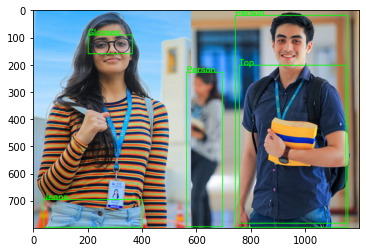

In [55]:
# Read image
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw 
start_point = (158, 593)
end_point = (287, 748)

# Blue color in RGB
color = (0, 255, 0)
  
# Line thickness of 2 px
thickness = 2


# font
font = cv2.FONT_HERSHEY_SIMPLEX

# fontScale
fontScale = 1
   

# Line thickness of 2 px
# thickness = 2
   


for bbox in bboxes:
    start_point = bbox['bbox'][0]
    end_point = bbox['bbox'][1]
    image = cv2.rectangle(image, start_point, end_point, color, thickness)
    
    image = cv2.putText(image, bbox['name'], start_point, font, 
                   fontScale, color, thickness, cv2.LINE_AA)

plt.imshow(image)

In [36]:
bboxes

[{'name': 'Person', 'bbox': [(1253, 529), (1594, 1094)]},
 {'name': 'Person', 'bbox': [(1375, 624), (1866, 1173)]},
 {'name': 'Person', 'bbox': [(1692, 506), (1889, 746)]},
 {'name': 'Person', 'bbox': [(1063, 531), (1300, 756)]},
 {'name': 'Person', 'bbox': [(1883, 463), (2041, 691)]},
 {'name': 'Person', 'bbox': [(612, 557), (965, 1010)]},
 {'name': 'Person', 'bbox': [(0, 406), (208, 1143)]},
 {'name': 'Person', 'bbox': [(235, 528), (405, 698)]},
 {'name': 'Person', 'bbox': [(1677, 507), (1885, 744)]},
 {'name': 'Table', 'bbox': [(187, 787), (784, 1174)]}]